In [7]:
#!pip install numpy
#!pip install pandas
# !pip install scipy
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install plotly-express
#!pip install sklearn.preprocessing
import numpy as np
import pandas as pd
!pip install scikit-learn
!pip install sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

ERROR: Could not find a version that satisfies the requirement sklearn.preprocessing (from versions: none)
ERROR: No matching distribution found for sklearn.preprocessing


In [8]:
from re import I


data = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')

In [3]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
0,"May 24, 2023","May 24, 2023",Run,541,4.65285,2704,9.68301,0.456555,6.19642,131.4190,149.0,7110.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7292053159
1,"May 22, 2023","May 22, 2023",Run,543,4.65168,2731,9.77750,5.351480,6.13654,11.2118,145.0,7143.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7287459745
2,"May 20, 2023","May 20, 2023",Run,569,4.23913,2834,11.13340,0.482923,5.38917,124.2430,152.0,7633.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7283442016
3,"May 19, 2023","May 19, 2023",Run,624,4.65109,2722,9.75349,0.447952,6.15165,133.9430,0.0,6847.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7281605500
4,"May 17, 2023","May 17, 2023",Run,603,4.49956,2635,9.75532,0.990110,6.15049,60.5993,0.0,6853.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7278574366


In [4]:
data.shape

(822, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          822 non-null    object 
 1   Workout Date            822 non-null    object 
 2   Activity Type           822 non-null    object 
 3   Calories Burned (kCal)  822 non-null    int64  
 4   Distance (mi)           822 non-null    float64
 5   Workout Time (seconds)  822 non-null    int64  
 6   Avg Pace (min/mi)       822 non-null    float64
 7   Max Pace (min/mi)       822 non-null    float64
 8   Avg Speed (mi/h)        822 non-null    float64
 9   Max Speed (mi/h)        822 non-null    float64
 10  Avg Heart Rate          565 non-null    float64
 11  Steps                   799 non-null    float64
 12  Notes                   822 non-null    object 
 13  Source                  822 non-null    object 
 14  Link                    822 non-null    ob

In [9]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(data['Distance (mi)'])
data['target'] = labels
data.drop(columns=['Link', 'Source', 'Notes', 'Max Pace (min/mi)', 'Max Speed (mi/h)'], inplace=True)

In [10]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Avg Speed (mi/h),Avg Heart Rate,Steps,target
0,"May 24, 2023","May 24, 2023",Run,541,4.65285,2704,9.68301,6.19642,149.0,7110.0,498
1,"May 22, 2023","May 22, 2023",Run,543,4.65168,2731,9.77750,6.13654,145.0,7143.0,497
2,"May 20, 2023","May 20, 2023",Run,569,4.23913,2834,11.13340,5.38917,152.0,7633.0,464
3,"May 19, 2023","May 19, 2023",Run,624,4.65109,2722,9.75349,6.15165,0.0,6847.0,496
4,"May 17, 2023","May 17, 2023",Run,603,4.49956,2635,9.75532,6.15049,0.0,6853.0,480


In [11]:
data.isnull().sum()

Date Submitted              0
Workout Date                0
Activity Type               0
Calories Burned (kCal)      0
Distance (mi)               0
Workout Time (seconds)      0
Avg Pace (min/mi)           0
Avg Speed (mi/h)            0
Avg Heart Rate            257
Steps                      23
target                      0
dtype: int64

In [10]:
# data['Date Submitted'] = pd.to_datetime(data['Date Submitted'], format='%Y-%m-%d')
# data['Workout Date'] = pd.to_datetime(data['Workout Date'], format='%Y-%m-%d')

In [12]:
data.describe()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Avg Speed (mi/h),Avg Heart Rate,Steps,target
count,822.000000,822.000000,822.000000,822.000000,822.000000,565.000000,799.000000,822.000000
mean,418.080292,3.289631,2151.145985,11.327228,5.554572,113.909735,5319.102628,298.725061
std,265.806072,2.045302,1317.047842,6.563436,1.607701,59.750136,3311.392641,165.192317
min,9.000000,0.000000,95.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,266.000000,2.234360,1539.250000,9.154843,5.235967,107.000000,3757.000000,180.250000
50%,405.000000,3.100000,1815.000000,9.813265,6.068610,145.000000,4735.000000,283.000000
75%,467.000000,3.739928,2540.000000,10.994975,6.486700,154.000000,6134.000000,424.750000
max,1928.000000,13.481600,11065.000000,123.477000,14.863700,173.000000,23604.000000,613.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
d1 = data.sort_values(by='Avg Pace (min/mi)', ascending=False)
data.head(11)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Avg Speed (mi/h),Avg Heart Rate,Steps,target
0,"May 24, 2023","May 24, 2023",Run,541,4.65285,2704,9.68301,6.19642,149.0,7110.0,498
1,"May 22, 2023","May 22, 2023",Run,543,4.65168,2731,9.77750,6.13654,145.0,7143.0,497
2,"May 20, 2023","May 20, 2023",Run,569,4.23913,2834,11.13340,5.38917,152.0,7633.0,464
3,"May 19, 2023","May 19, 2023",Run,624,4.65109,2722,9.75349,6.15165,0.0,6847.0,496
4,"May 17, 2023","May 17, 2023",Run,603,4.49956,2635,9.75532,6.15049,0.0,6853.0,480
5,"May 16, 2023","May 16, 2023",Run,539,4.59691,2877,10.42310,5.75645,145.0,7650.0,490
6,"May 14, 2023","May 14, 2023",Run,401,3.26102,2156,11.01430,5.44746,128.0,5550.0,371
7,"May 13, 2023","May 13, 2023",Run,621,4.60679,2732,9.88183,6.07175,0.0,7056.0,491
8,"May 11, 2023","May 11, 2023",Run,559,4.59194,3578,12.98360,4.62122,137.0,7603.0,489
9,"May 10, 2023","May 10, 2023",Run,564,4.53749,3191,11.71690,5.12082,147.0,7168.0,487


In [15]:
# data = data[data['Avg Pace (min/mi)'] < 20]
# data = data[data['Avg Pace (min/mi)'] > 0]
# data = data[data['Max Pace (min/mi)'] < 20]
# data = data[data['Max Pace (min/mi)'] > 0]
# data.head(11)
data['Avg Heart Rate'].fillna(data['Avg Heart Rate'].median(), inplace=True)
data.fillna(0, inplace=True)
# data.sort_values(by='Avg Pace (min/mi)', ascending=False)

#replace the extremely large values with the median
data.loc[data['Avg Pace (min/mi)'] > 20, 'Avg Pace (min/mi)'] = data['Avg Pace (min/mi)'].median()
#Use numpy instead of pandas to calculate the median
data['Avg Heart Rate'] = np.where(data['Avg Heart Rate'] < 30, data['Avg Heart Rate'].median(), data['Avg Heart Rate'])

<AxesSubplot:xlabel='Activity Type', ylabel='count'>

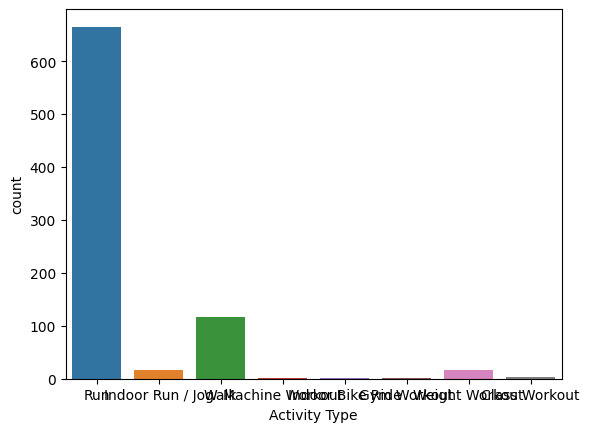

In [16]:
sns.countplot(x='Activity Type', data=data)

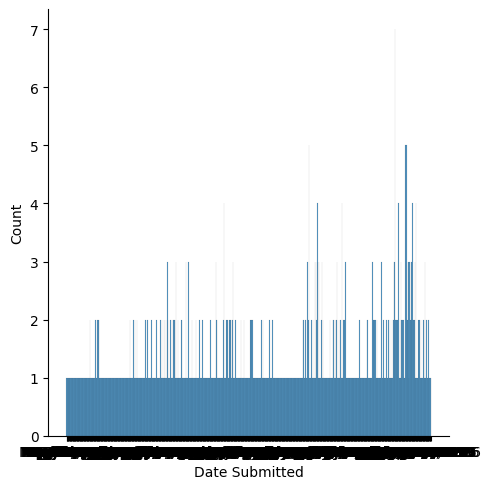

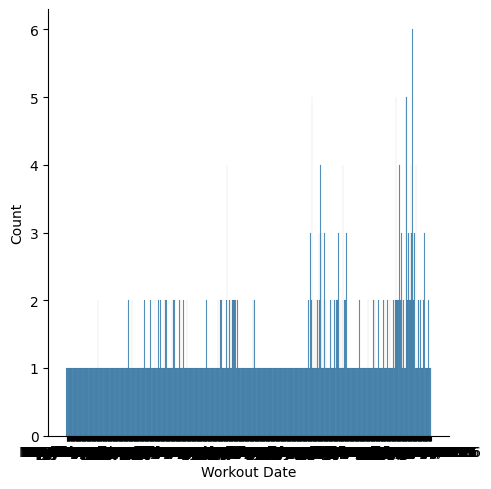

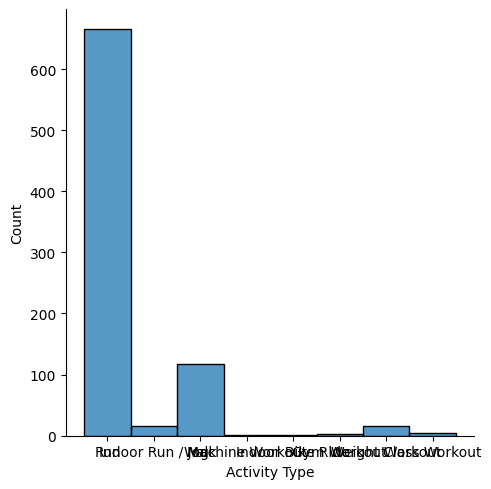

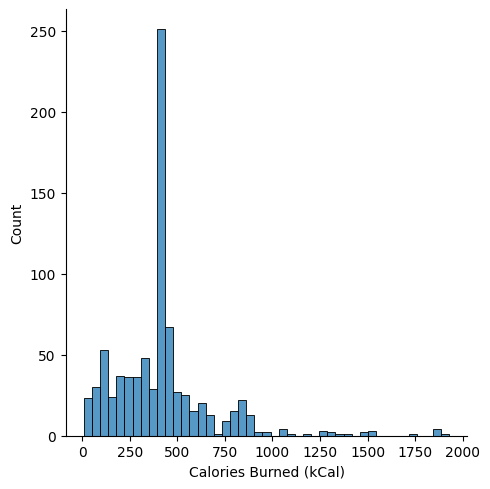

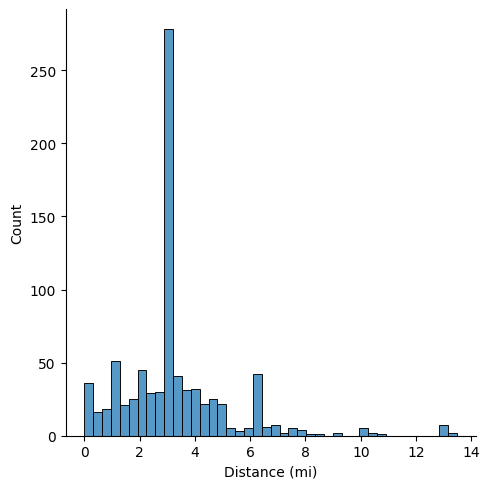

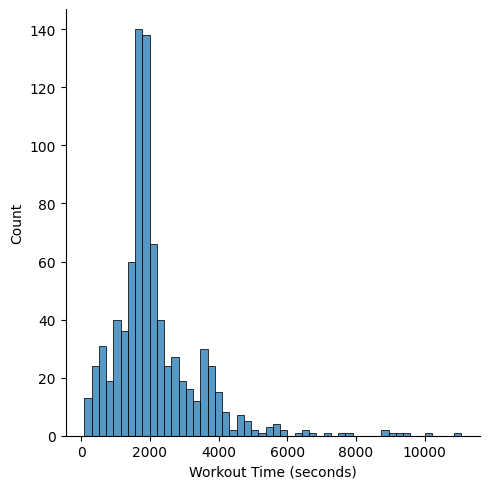

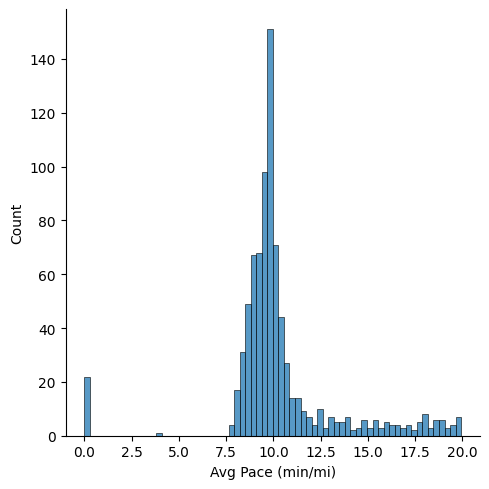

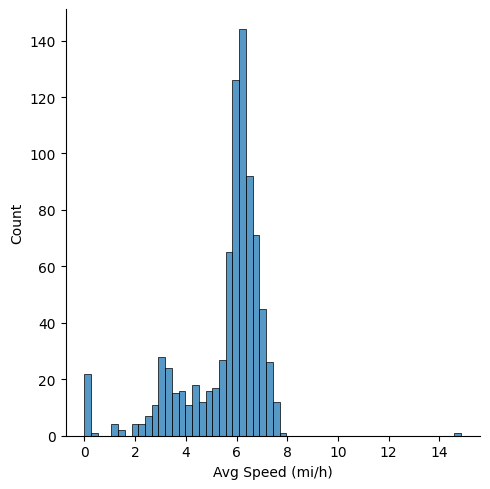

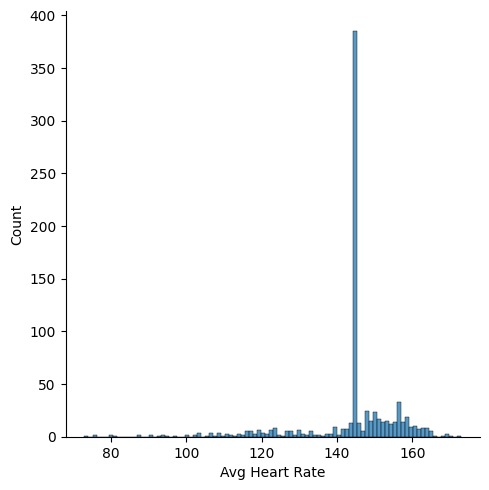

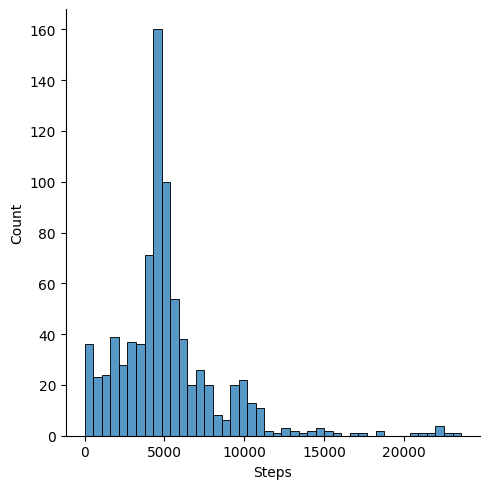

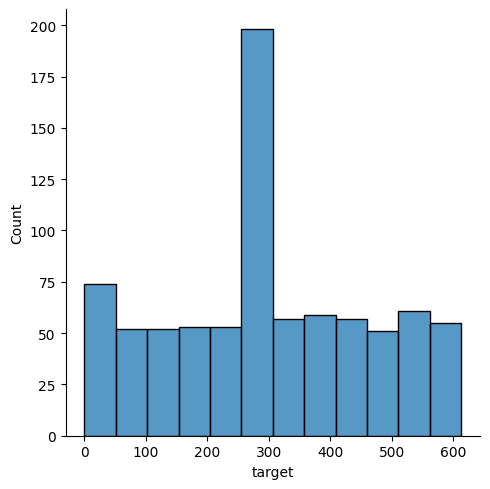

In [17]:
for column in data:
    sns.displot(x=column, data=data)

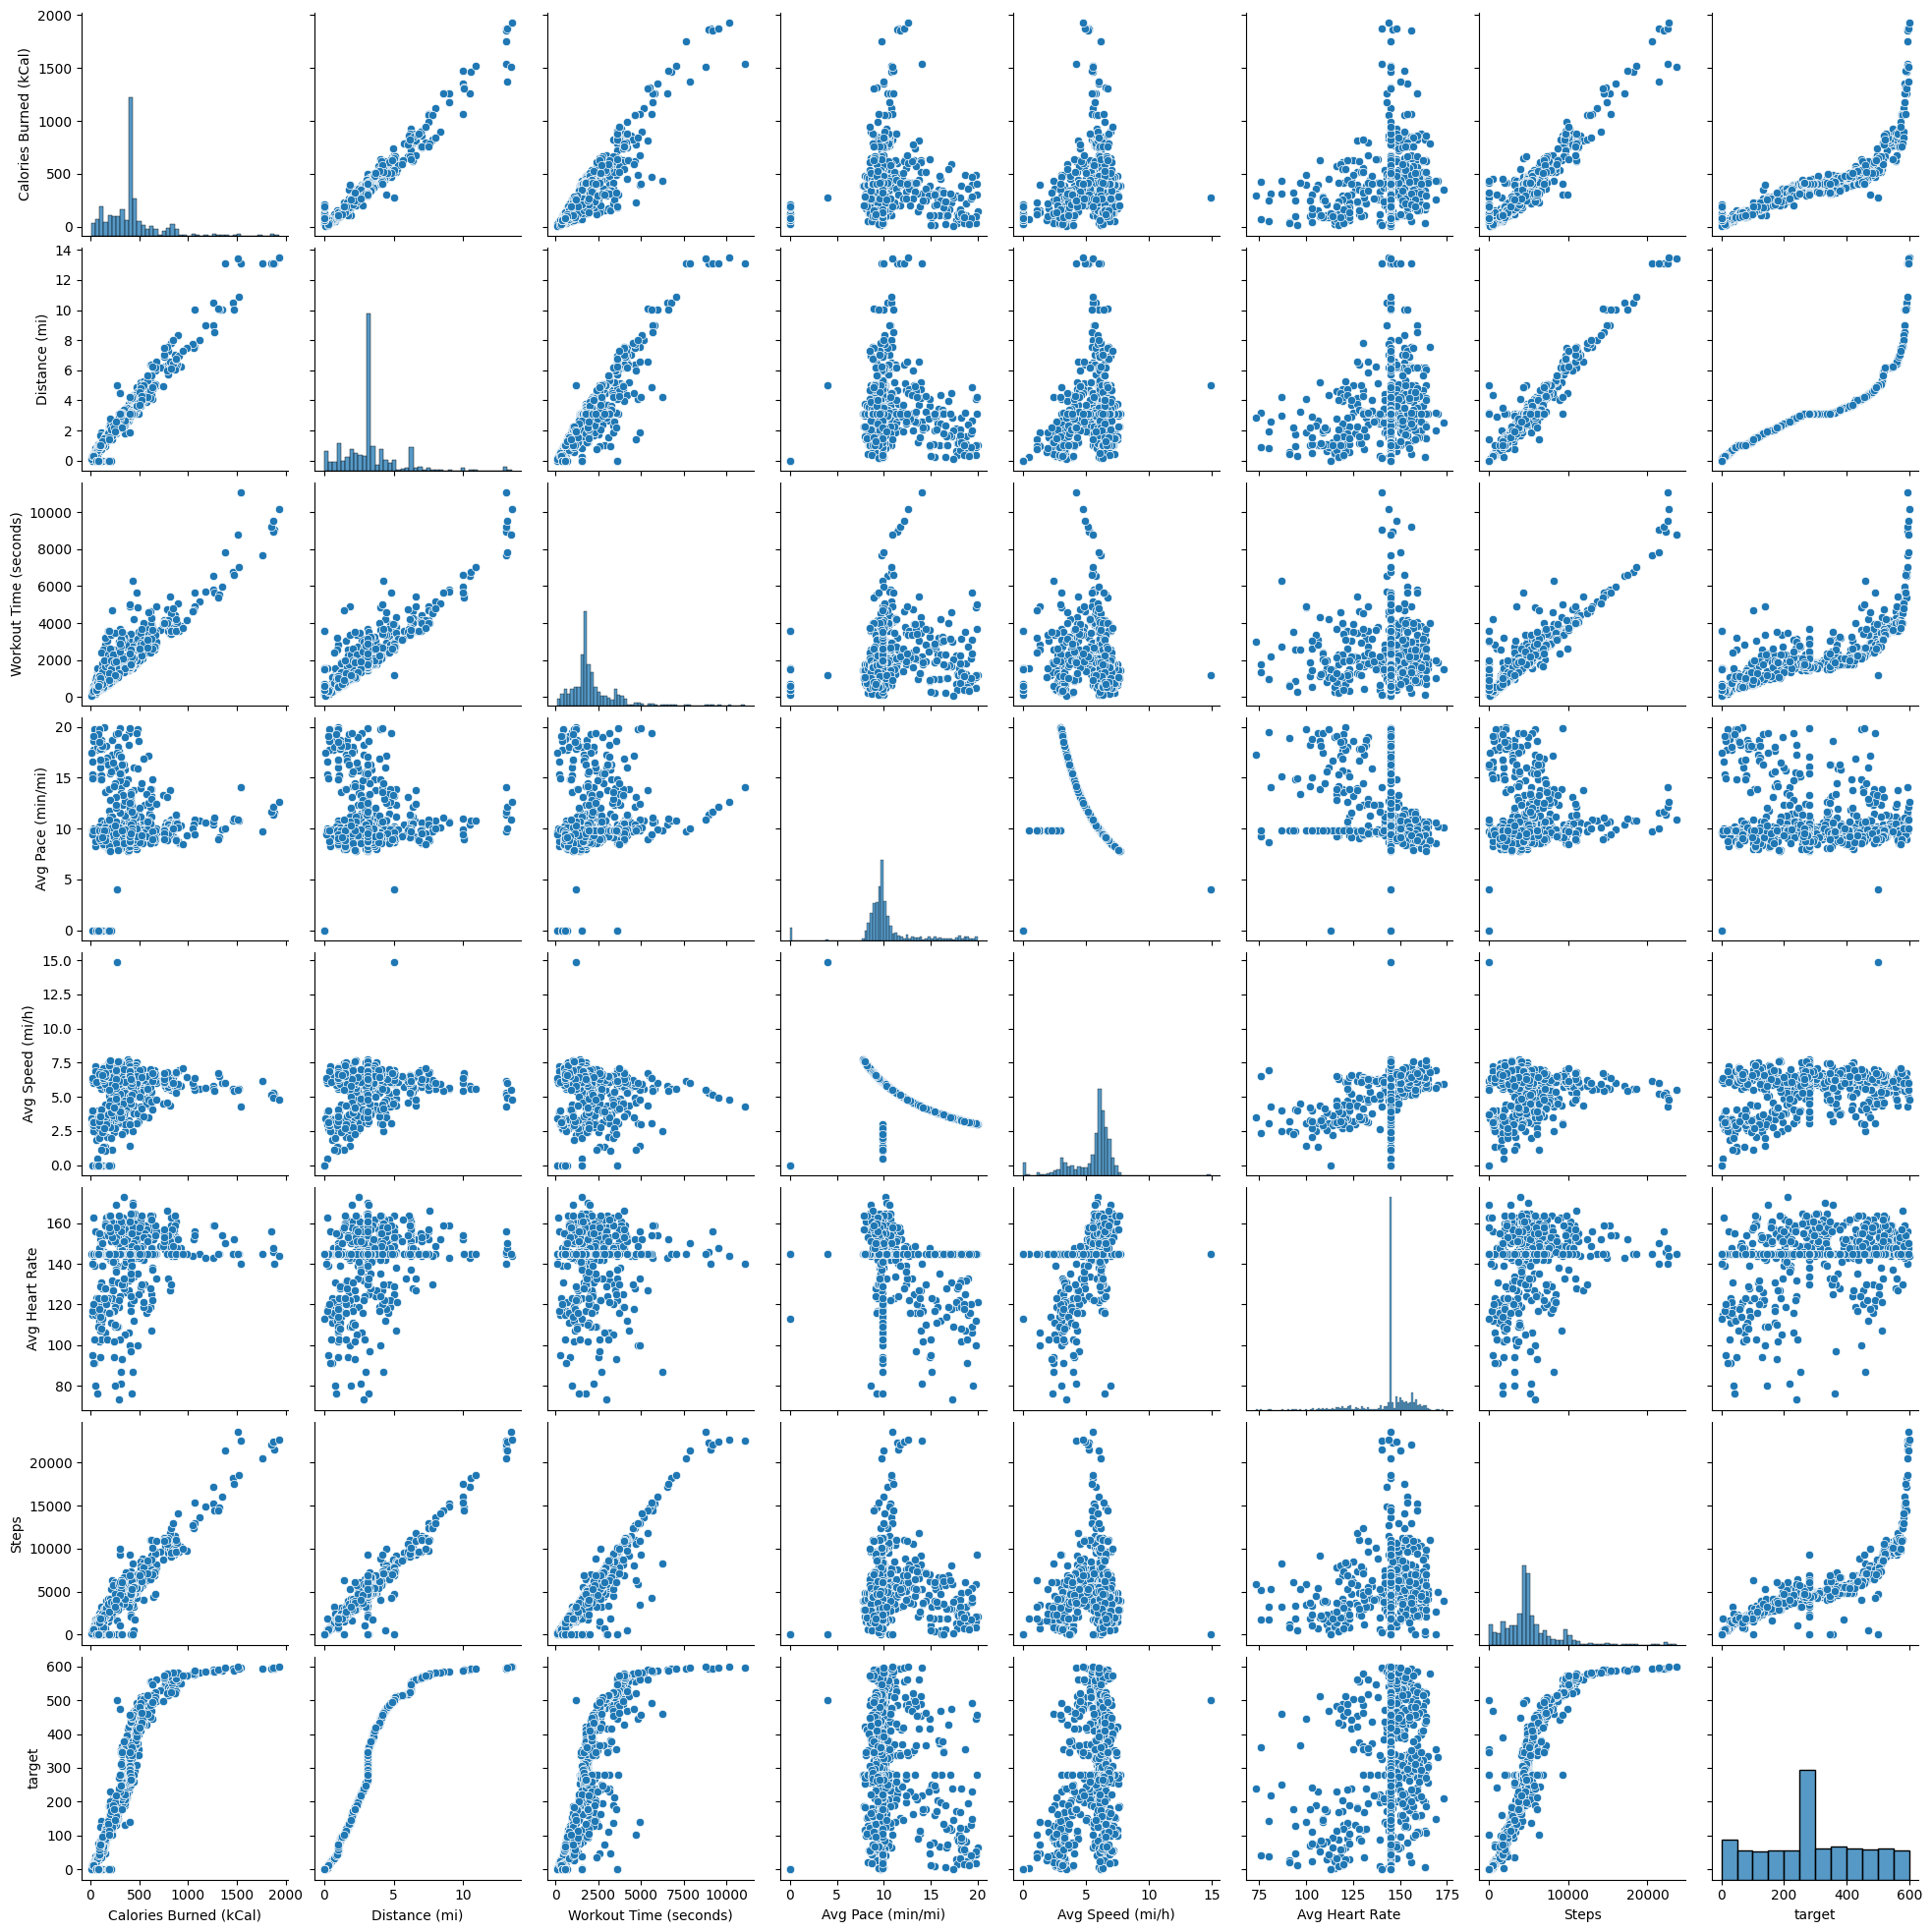

In [17]:
sns.pairplot(data)